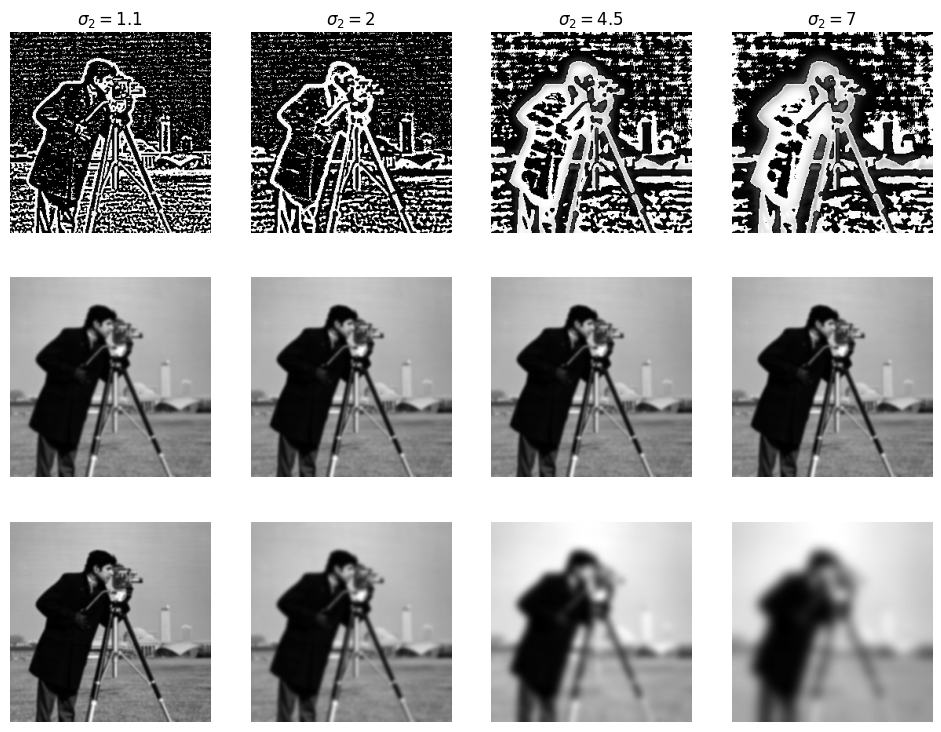

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


def dog_filter(image, sigma1, sigma2, i):
    gaussian1 = gaussian_filter(image, sigma=sigma1)
    plt.subplot(3, 5,  5 + i)
    plt.imshow(gaussian1, cmap='gray')
    plt.axis('off')
    gaussian2 = gaussian_filter(image, sigma=sigma2)
    plt.subplot(3, 5,  10 + i)
    plt.imshow(gaussian2, cmap='gray')
    plt.axis('off')
    dog = gaussian1 - gaussian2
    return dog


# Generate a sample image (e.g., a simple gradient with noise)
image = plt.imread("./data/camera.tif")

sigma1 = 1.5
sigma2_values = [1.1, 2, 4.5, 7]

plt.figure(figsize=(15, 9))

for i, sigma2 in enumerate(sigma2_values, 1):
    dog_result = dog_filter(image, sigma1, sigma2, i)
    plt.subplot(3, 5, i)
    plt.imshow(dog_result, cmap='gray')
    plt.title(
        r"$\sigma_2 = $"f'{sigma2}', fontdict={'size': 12})
    plt.axis('off')

plt.axis('off')
plt.show()

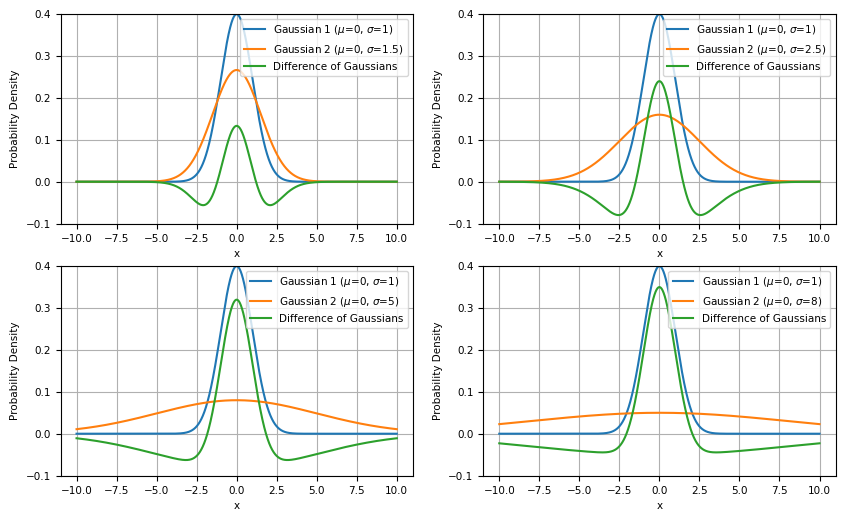

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian function


def gaussian(x, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


# Define parameters
mu1, sigma1 = 0, 1  # Mean and standard deviation for the first Gaussian
# Mean and standard deviation for the second Gaussian
mu2, sigma2s = 0, [1.5, 2.5, 5, 8]

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 7.5})
for i, sigma2 in enumerate(sigma2s, 1):

    # Create an array of x values
    x = np.linspace(-10, 10, 5000)

    # Calculate Gaussian distributions
    gaussian1 = gaussian(x, mu1, sigma1)
    gaussian2 = gaussian(x, mu2, sigma2)

    # Calculate the Difference of Gaussians (DoG)
    dog = gaussian1 - gaussian2

    # Plot the Gaussians and their difference
    plt.subplot(2, 2, i)
    plt.plot(x, gaussian1,
             label=f'Gaussian 1 ($\mu$={mu1}, $\sigma$={sigma1})')
    plt.plot(x, gaussian2,
             label=f'Gaussian 2 ($\mu$={mu2}, $\sigma$={sigma2})')
    plt.plot(x, dog, label='Difference of Gaussians')

    # plt.title('Gaussian Distributions and their Difference')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.ylim(-0.1, 0.4)
    plt.legend()
    plt.grid(True)
plt.show()